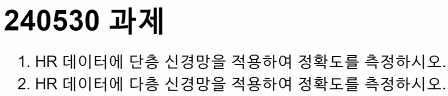

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import pandas as pd
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam # adam 의 러닝레이트를 바꾸기 위해서는
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
tf.config.list_physical_devices('GPU')
tf.debugging.set_log_device_placement(False)

In [3]:
plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [4]:
train_data = pd.read_csv("../data/hr_data/hr_train_scaling.csv", index_col=0)
test_data = pd.read_csv("../data/hr_data/hr_test_scaling.csv",  index_col=0)

In [5]:
x_train = train_data.drop(columns=["attrition"]).values
y_train = train_data["attrition"].values
x_test = test_data.drop(columns=["attrition"]).values
y_test = test_data["attrition"].values

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1094, 12)
(1094,)
(365, 12)
(365,)


### 단층

In [6]:
model_single = Sequential()
model_single.add(Dense(1,
                       kernel_initializer= 'he_normal',
                       activation = "sigmoid",
                       input_shape = (12, )),)
model_single.summary()

adam = Adam(learning_rate=0.002)

model_single.compile(loss = "binary_crossentropy",
                     optimizer=adam,
                     metrics=["accuracy"])

early_s = EarlyStopping(patience=3, # 보통 3 정도 
                        restore_best_weights=True)

model_single_history = model_single.fit(x_train, y_train,
                                    epochs=100,
                                    batch_size = 100,
                                    validation_split=0.2,
                                    callbacks=[early_s],
                                    verbose = 0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


### 다층

In [7]:
%%time

model_multi = Sequential()
model_multi.add(Dense(8,
                       kernel_initializer= 'he_normal',
                       activation = "relu",
                       input_shape = (12, )),)
model_multi.add(Dropout(0.3))
model_multi.add(Dense(4,
                       kernel_initializer= 'he_normal',
                       activation = "relu"))
model_multi.add(Dropout(0.3))
model_multi.add(Dense(1,
                       kernel_initializer= 'he_normal',
                       activation = "sigmoid"))

# model_multi.summary()

adam = Adam(learning_rate=0.002)

model_multi.compile(loss = "binary_crossentropy",
                     optimizer=adam,
                     metrics=["accuracy"])

# early_s = EarlyStopping(patience=2, # 보통 3 정도 
#                         restore_best_weights=True)

model_multi_history = model_multi.fit(x_train, y_train,
                                    epochs=100,
                                    batch_size = 100,
                                    validation_split=0.2,
                                    # callbacks=[early_s],
                                    verbose = 1)


Epoch 1/100
9/9 [==============================] - 1s 21ms/step - loss: 0.6992 - accuracy: 0.6343 - val_loss: 0.6646 - val_accuracy: 0.6027
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6457 - accuracy: 0.7063 - val_loss: 0.6227 - val_accuracy: 0.6712
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 0.6196 - accuracy: 0.7417 - val_loss: 0.5876 - val_accuracy: 0.7215
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5881 - accuracy: 0.7794 - val_loss: 0.5586 - val_accuracy: 0.7580
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5614 - accuracy: 0.8229 - val_loss: 0.5353 - val_accuracy: 0.7808
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5335 - accuracy: 0.8309 - val_loss: 0.5213 - val_accuracy: 0.7808
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5371 - accuracy: 0.8411 - val_loss: 0.5127 - val_accuracy: 0.7854
Epoch 8/100
9/9 [========

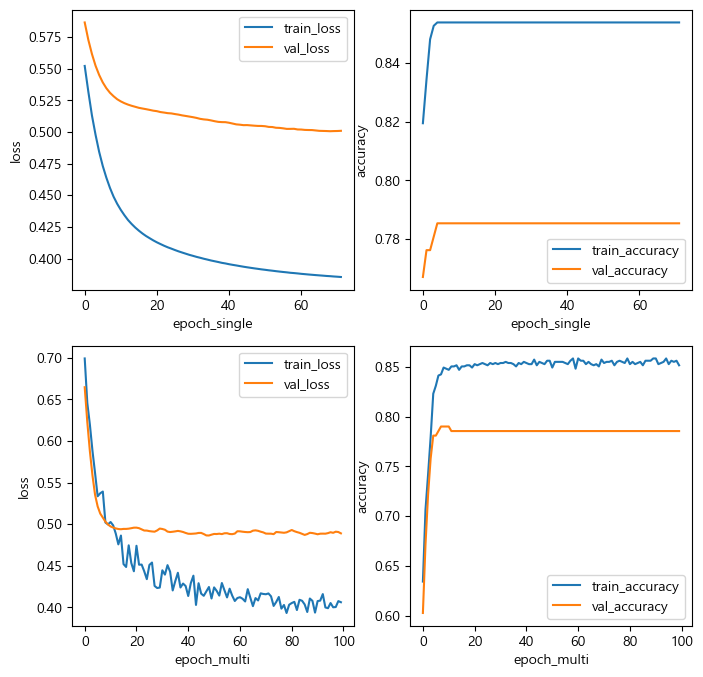

In [8]:
fig, ax = plt.subplots(2,2, figsize = (8,8))

ax[0][0].plot(model_single_history.history["loss"] , label = "train_loss")
ax[0][0].plot(model_single_history.history["val_loss"] , label = "val_loss")
ax[0][0].set(xlabel = "epoch_single", ylabel= "loss")
ax[0][0].legend()

ax[0][1].plot(model_single_history.history["accuracy"] , label = "train_accuracy")
ax[0][1].plot(model_single_history.history["val_accuracy"] , label = "val_accuracy")
ax[0][1].set(xlabel = "epoch_single", ylabel= "accuracy")
ax[0][1].legend();

ax[1][0].plot(model_multi_history.history["loss"] , label = "train_loss")
ax[1][0].plot(model_multi_history.history["val_loss"] , label = "val_loss")
ax[1][0].set(xlabel = "epoch_multi", ylabel= "loss")
ax[1][0].legend()

ax[1][1].plot(model_multi_history.history["accuracy"] , label = "train_accuracy")
ax[1][1].plot(model_multi_history.history["val_accuracy"] , label = "val_accuracy")
ax[1][1].set(xlabel = "epoch_multi", ylabel= "accuracy")
ax[1][1].legend();

In [13]:
model_single_pred = model_single.predict(x_test).flatten() >= 0.83
metrics.accuracy_score(model_single_pred, y_test)

12/12 [==============================] - 0s 1ms/step


0.8383561643835616

In [19]:
model_multi_pred = model_multi.predict(x_test).flatten() >= 0.83
metrics.accuracy_score(model_multi_pred, y_test)

12/12 [==============================] - 0s 2ms/step


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

### 임계값 설정

In [15]:
from sklearn.metrics import roc_curve, precision_recall_curve

# 모델의 예측 확률 값
y_pred_prob = model_single.predict(x_test).flatten()

# ROC 커브와 임계값을 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Precision-Recall 커브와 임계값을 계산
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_prob)

# 최적의 임계값을 결정 (예시: Youden's J 통계량 사용)
youden_index = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden_index)]

print("Optimal threshold:", optimal_threshold)

# 최적의 임계값을 사용하여 모델 예측
model_single_pred_optimal = y_pred_prob >= optimal_threshold

# 정확도 계산
accuracy_optimal = metrics.accuracy_score(model_single_pred_optimal, y_test)

print("Optimal Accuracy:", accuracy_optimal)

12/12 [==============================] - 0s 1ms/step
Optimal threshold: 0.17770731
Optimal Accuracy: 0.7534246575342466


In [17]:
from sklearn.metrics import roc_curve, precision_recall_curve

# 모델의 예측 확률 값
y_pred_prob = model_multi.predict(x_test).flatten()

# ROC 커브와 임계값을 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Precision-Recall 커브와 임계값을 계산
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_prob)

# 최적의 임계값을 결정 (예시: Youden's J 통계량 사용)
youden_index = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden_index)]

print("Optimal threshold:", optimal_threshold)

# 최적의 임계값을 사용하여 모델 예측
model_modelmulti_pred_optimal = y_pred_prob >= optimal_threshold

# 정확도 계산
accuracy_optimal = metrics.accuracy_score(model_modelmulti_pred_optimal, y_test)

print("Optimal Accuracy:", accuracy_optimal)

12/12 [==============================] - 0s 1ms/step
Optimal threshold: 0.18361598
Optimal Accuracy: 0.7150684931506849
